In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

https://stackoverflow.com/questions/78300816/python-fitting-into-a-system-of-equations

In [2]:
data = pd.read_csv("frumkin.csv", header=None, names=["Cs", "gamma"])

In [27]:
def system(x, Cs, a, K):
    return x - Cs / (Cs + a * np.exp(K * x))

In [28]:
def solution(Cs, a, K):
    x = np.array([optimize.fsolve(system, x0=0.05, args=(c, a, K))[0] for c in Cs])
    return x

In [29]:
R = 8.314
T = 298.

In [30]:
def model(Cs, g0, Ginf, a, K):
    x = solution(Cs, a, K)
    return g0 + Ginf * R * T * (np.log(1. - x) - 0.5 * K * x ** 2)

In [31]:
popt, pcov = optimize.curve_fit(
    model, data.Cs, data.gamma,
    p0=[100., 1e-5, 1e-5, 1.],
    bounds=[(0., 0., 0., 0.), (np.inf, np.inf, np.inf, np.inf)]
)
popt, pcov

(array([7.28040792e+01, 3.58127986e-01, 1.43487197e-08, 3.72400451e+02]),
 array([[9.69529625e-01, 1.44211139e+00, 9.17549249e-08, 1.47632773e+03],
        [1.44211139e+00, 2.34197635e+00, 1.49948391e-07, 2.39273423e+03],
        [9.17549249e-08, 1.49948391e-07, 9.60566745e-15, 1.53170451e-04],
        [1.47632773e+03, 2.39273423e+03, 1.53170451e-04, 2.44475302e+06]]))

In [32]:
ghat = model(data.Cs, *popt)

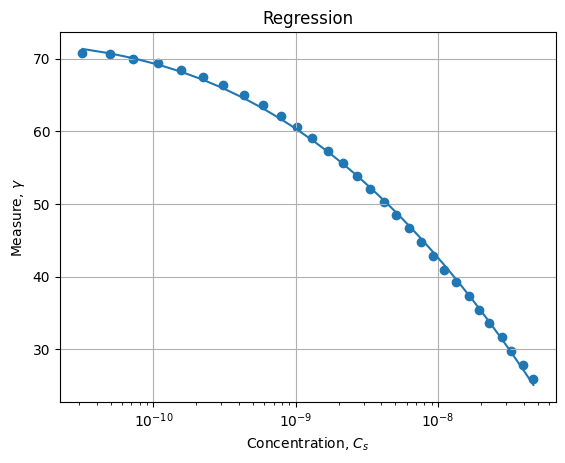

In [94]:
fig, axe = plt.subplots()
axe.scatter(data.Cs, data.gamma)
axe.semilogx(data.Cs, ghat)
axe.set_title("Regression")
axe.set_xlabel("Concentration, $C_s$")
axe.set_ylabel("Measure, $\gamma$")
axe.grid()

In [33]:
@np.vectorize
def solution(Cs, a, K):
    return optimize.fsolve(system, x0=0.05, args=(Cs, a, K))[0]

In [68]:
Cs = np.logspace(-12, -6, 100, base=10)
As = np.logspace(-12, -6, 10, base=10)
Ks = np.logspace(-5, +5, 10, base=10)
C, A, K = np.meshgrid(Cs, As, Ks, indexing="ij")

In [69]:
s = solution(C, A, K)

/tmp/ipykernel_636/562649722.py:2: RuntimeWarning: overflow encountered in exp
  return x - Cs / (Cs + a * np.exp(K * x))
/tmp/ipykernel_636/223167084.py:3: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  return optimize.fsolve(system, x0=0.05, args=(Cs, a, K))[0]


In [70]:
s.shape

(100, 10, 10)

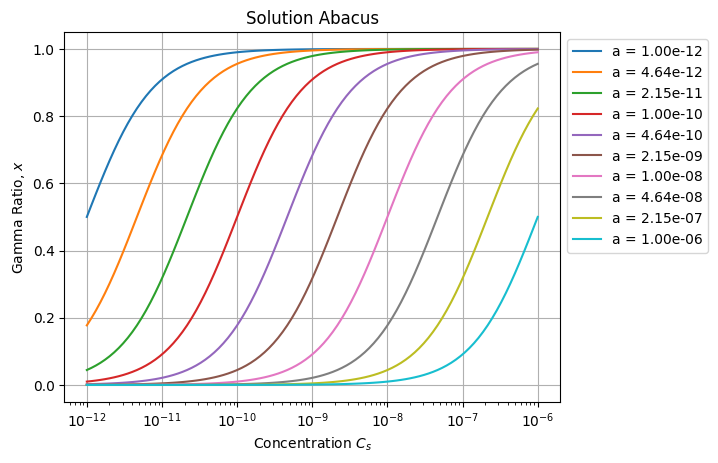

In [85]:
fig, axe = plt.subplots()
axe.semilogx(Cs, s[:,:,0])
axe.legend(["a = %.2e" % A for A in As], bbox_to_anchor=(1, 1))
axe.set_title("Solution Abacus")
axe.set_xlabel("Concentration $C_s$")
axe.set_ylabel("Gamma Ratio, $x$")
axe.grid()

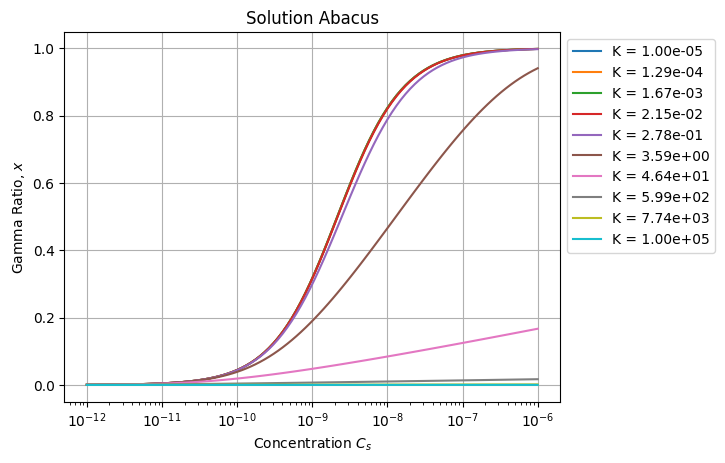

In [90]:
fig, axe = plt.subplots()
axe.semilogx(Cs, s[:,5,:])
axe.legend(["K = %.2e" % K for K in Ks], bbox_to_anchor=(1, 1))
axe.set_title("Solution Abacus")
axe.set_xlabel("Concentration $C_s$")
axe.set_ylabel("Gamma Ratio, $x$")
axe.grid()